# Investigating ML Throughput

In [1]:
# Loading event json
import json
import math
# Plotting the timeline
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Job Completion

In [11]:
completion = [88, 85, 90]
print(statistics.mean(completion))
print(statistics.stdev(completion))

87.66666666666667
2.516611478423583


## Pod Completion

In [3]:
try:
    df1 = pd.read_csv('pi-2000-1000x-pod/pi-2000-1000x-pod-completion1.csv')
    df2 = pd.read_csv('pi-2000-1000x-pod/pi-2000-1000x-pod-completion2.csv')
    df3 = pd.read_csv('pi-2000-1000x-pod/pi-2000-1000x-pod-completion3.csv')
    df = pd.concat([df1, df2, df3], axis=1)
    df = df.drop(columns=['Time'])
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

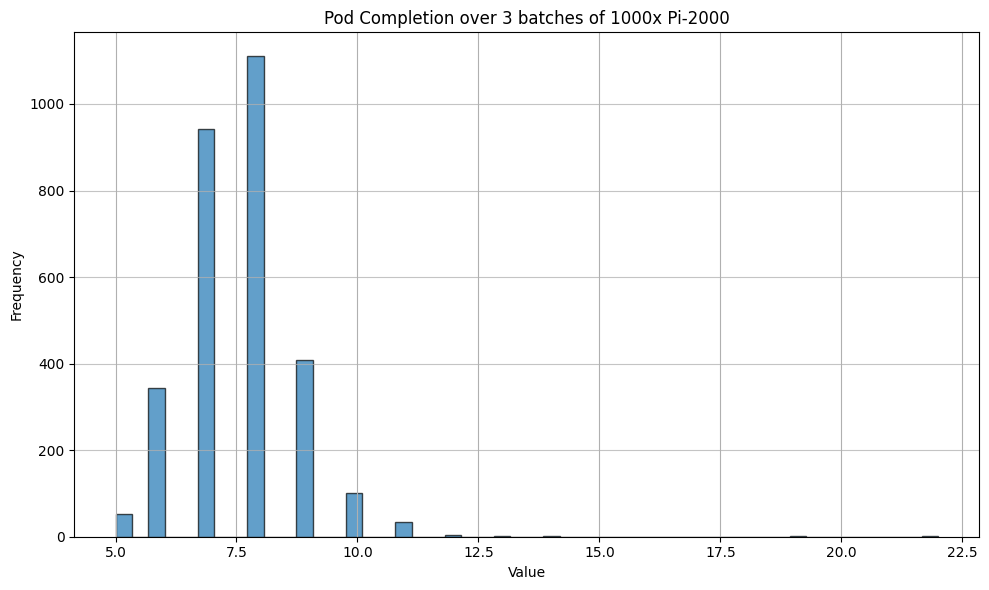

In [5]:
single_row = df.iloc[0] # This will be a pandas Series

# Alternatively, convert the DataFrame to a NumPy array and flatten it
# single_row_array = df.to_numpy().flatten()

# 3. Create the histogram

# Method A: Using pandas built-in .hist() method (most straightforward)
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
single_row.hist(bins=50, edgecolor='black', alpha=0.7) # bins determines the number of bars
plt.title('Pod Completion over 3 batches of 1000x Pi-2000')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('figures/pi-2000-1000x-pod-completion.png')
plt.show()


In [6]:
statistical_summary = single_row.describe()

print("\n--- Statistical Summary (using .describe()) ---")
print(statistical_summary)

# 4. Customizing Percentiles (if you need specific ones)
# You can specify the percentiles you want using the 'percentiles' argument in describe()
custom_percentiles = single_row.describe(percentiles=[.01, .10, .25, .50, .75, .90, .99])

print("\n--- Statistical Summary with Custom Percentiles ---")
print(custom_percentiles)

# 5. Extracting individual percentiles if needed
# You can also get individual percentiles using the .quantile() method
p10 = single_row.quantile(0.10)
p90 = single_row.quantile(0.90)

print(f"\nValue at 10th percentile: {p10:.2f}")
print(f"Value at 90th percentile: {p90:.2f}")


--- Statistical Summary (using .describe()) ---
count    3000.000000
mean        7.666000
std         1.190063
min         5.000000
25%         7.000000
50%         8.000000
75%         8.000000
max        22.000000
Name: 0, dtype: float64

--- Statistical Summary with Custom Percentiles ---
count    3000.000000
mean        7.666000
std         1.190063
min         5.000000
1%          5.000000
10%         6.000000
25%         7.000000
50%         8.000000
75%         8.000000
90%         9.000000
99%        11.000000
max        22.000000
Name: 0, dtype: float64

Value at 10th percentile: 6.00
Value at 90th percentile: 9.00


## Pod Running

In [7]:
try:
    df = pd.read_csv('pi-2000-1000x-pod/pi-2000-1000x-pod-running.csv')
    df['Time'] = pd.to_datetime(df['Time'], unit='ms')
    df = df.set_index('Time')
    df = df - 1
    # df.index = pd.to_datetime(df.index, errors='coerce')
    df.info()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 440 entries, 2025-05-21 23:44:22 to 2025-05-21 23:51:41
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   dev-k8s-lc869-01  440 non-null    int64
 1   dev-k8s-lc869-02  440 non-null    int64
 2   dev-k8s-lc869-03  440 non-null    int64
 3   dev-k8s-lc869-04  440 non-null    int64
 4   dev-k8s-lc869-05  440 non-null    int64
 5   dev-k8s-lc869-06  440 non-null    int64
 6   dev-k8s-lc869-07  440 non-null    int64
 7   dev-k8s-lc869-08  440 non-null    int64
 8   dev-k8s-lc869-09  440 non-null    int64
 9   dev-k8s-lc869-10  440 non-null    int64
 10  dev-k8s-lc869-11  440 non-null    int64
 11  dev-k8s-lc869-12  440 non-null    int64
 12  dev-k8s-lc869-13  440 non-null    int64
 13  dev-k8s-lc869-14  440 non-null    int64
 14  dev-k8s-lc869-15  440 non-null    int64
 15  dev-k8s-lc869-16  440 non-null    int64
 16  dev-k8s-lc869-17  440 non-null    int64
 17


Start Timestamp (Unix): 1747871207
End Timestamp (Unix): 1747871347


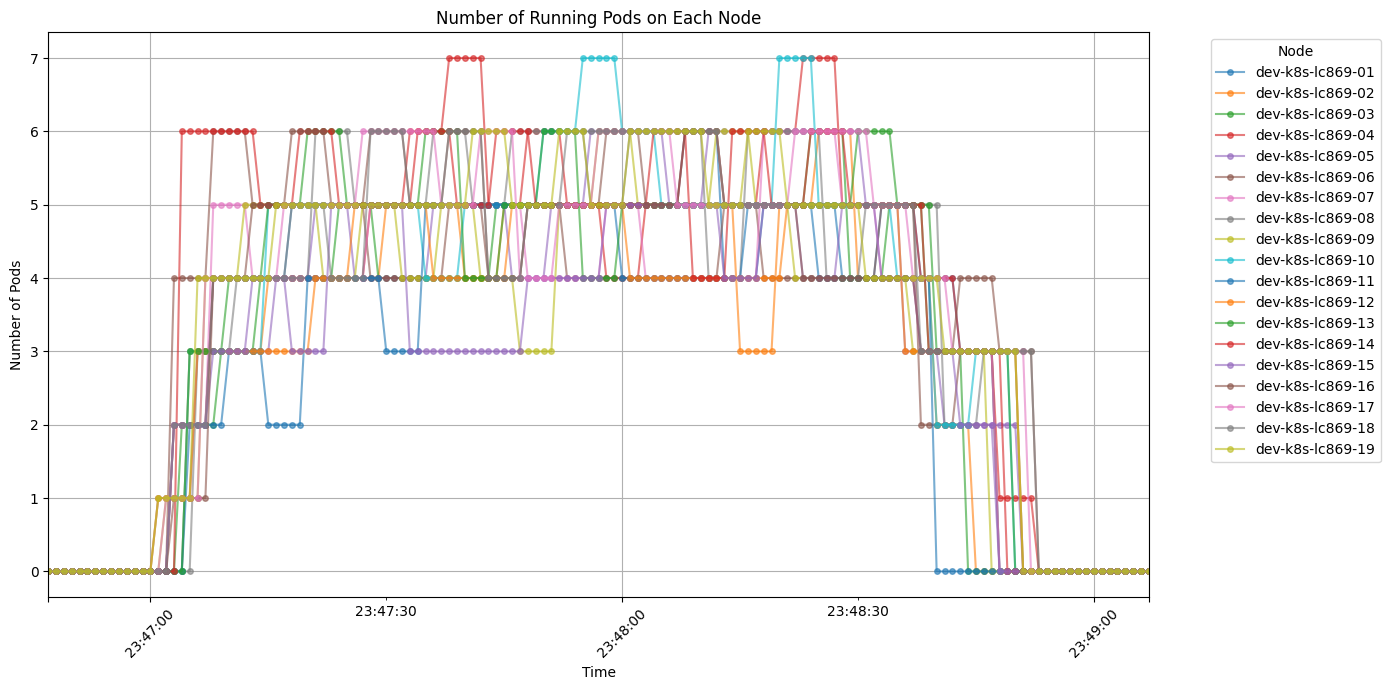

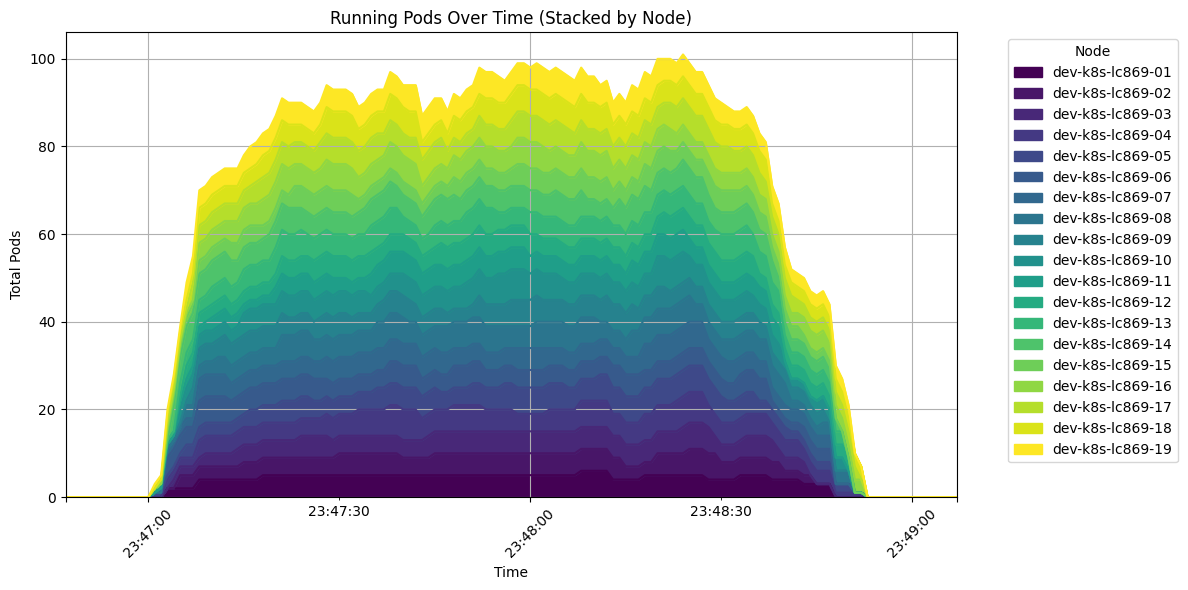

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define your time range (these are already pandas Timestamp objects)
start_dt = pd.to_datetime('2025-05-21 23:46:47')
end_dt = pd.to_datetime('2025-05-21 23:49:07')

# Print the Unix timestamps for verification (optional, but good for debugging)
print(f"\nStart Timestamp (Unix): {int(start_dt.timestamp())}")
print(f"End Timestamp (Unix): {int(end_dt.timestamp())}")

# 2. Slice the DataFrame to the restricted time range
# df.loc[start_dt:end_dt] directly works because df.index is now DatetimeIndex
df_restricted = df.loc[start_dt:end_dt]

if df_restricted.empty:
    print(f"\nNo data found for the specified time range: {start_dt} to {end_dt}. Please check your CSV data's time range.")
else:
    # 3. Plot the number of pods on each node as a line graph
    plt.figure(figsize=(14, 7)) # Adjusted figure size for more lines
    df_restricted.plot(kind='line', marker='o', linestyle='-', ax=plt.gca(), markersize=4, alpha=0.6) # Plot df_restricted directly

    plt.title('Number of Running Pods on Each Node')
    plt.xlabel('Time')
    plt.ylabel('Number of Pods')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Node', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside to avoid obscuring lines
    plt.tight_layout()
    plt.savefig('figures/pi-2000-1000x-pod-running.png')
    plt.show()

    # --- Original second graph (Stacked Area Plot of Total Pods by Node) ---
    plt.figure(figsize=(12, 6))
    df_restricted.plot(kind='area', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title('Running Pods Over Time (Stacked by Node)')
    plt.xlabel('Time')
    plt.ylabel('Total Pods')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Node', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('figures/pi-2000-1000x-pod-running-stacked.png')
    plt.show()

## Resource Utilisation

In [38]:
filepath = 'pi-2000-1000x-pod/pi-2000-1000x-pod-cpu-util.csv'
try:
    df = pd.read_csv(filepath)
    df = df.set_index('Time')

    # df.index = pd.to_datetime(df.index, errors='coerce')
    df.info()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2025-05-26 17:11:00 to 2025-05-26 17:13:00
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   10.244.1.173:32000   25 non-null     float64
 1   10.244.20.254:32000  25 non-null     float64
 2   10.244.21.15:32000   24 non-null     float64
 3   10.244.22.190:32000  25 non-null     float64
 4   10.244.23.28:32000   25 non-null     float64
 5   10.244.24.156:32000  25 non-null     float64
 6   10.244.25.199:32000  25 non-null     float64
 7   10.244.26.148:32000  25 non-null     float64
 8   10.244.28.200:32000  25 non-null     float64
 9   10.244.29.56:32000   25 non-null     float64
 10  10.244.30.88:32000   25 non-null     float64
 11  10.244.31.26:32000   25 non-null     float64
 12  10.244.32.247:32000  25 non-null     float64
 13  10.244.33.120:32000  24 non-null     float64
 14  10.244.34.173:32000  25 non-null     float64
 15  10.244.36.32

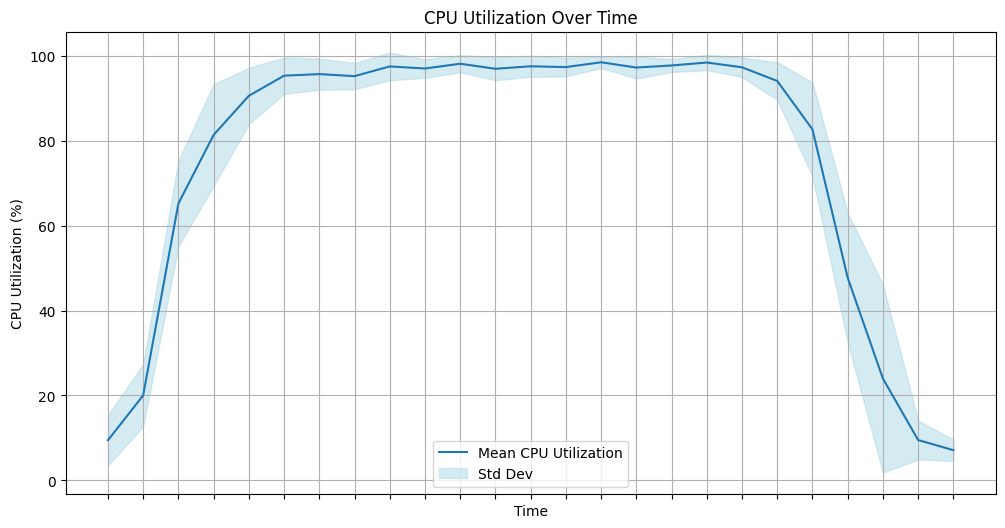

In [39]:
# Calculate the mean CPU utilization across all machines for each time point
df['mean_cpu_utilization'] = df.mean(axis=1)

# Calculate the standard deviation of CPU utilization across all machines for each time point
df['std_cpu_utilization'] = df.std(axis=1)

# Plot the mean and standard deviation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mean_cpu_utilization'], label='Mean CPU Utilization')
plt.fill_between(df.index, df['mean_cpu_utilization'] - df['std_cpu_utilization'],
                 df['mean_cpu_utilization'] + df['std_cpu_utilization'], color='lightblue', alpha=0.5, label='Std Dev')
plt.tick_params(axis='x', labelbottom=False)
plt.title('CPU Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Utilization (%)')
plt.legend()
plt.grid(True)
plt.savefig('figures/pi-2000-1000x-pod-cpu-util.png')
plt.show()